In [38]:
import pandas as pd
import numpy as np

import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [39]:
df_raw = pd.read_csv("rawdata/IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
df_raw["SPECIES"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
df_raw_x = df_raw.drop(["SPECIES"], axis = 1)
df_raw_y = df_raw["SPECIES"]

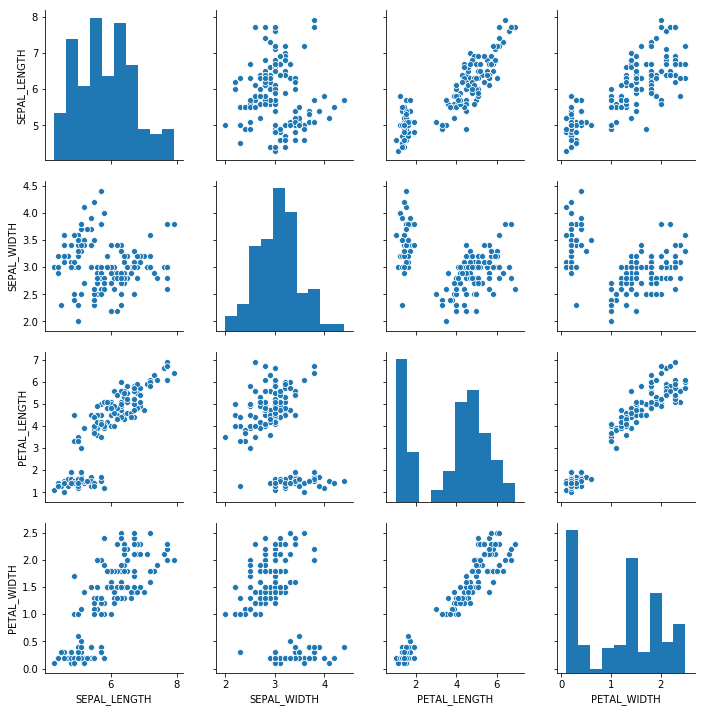

In [42]:
sns.pairplot(df_raw_x)

In [43]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [44]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [45]:
x_cols = df_raw_x.columns

In [46]:
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data: ")
print(nd_scaled[:5].round(3))
print("Shape: {}".format(nd_scaled.shape))

Scaled Data: 
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape: (150, 4)


In [47]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [48]:
pca = PCA(n_components = len(df_raw_x.columns))
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data: ")
print(nd_pca[:5].round(3))
print("Shape: {}".format(nd_pca.shape))

PCA Data: 
[[-2.265  0.48  -0.128 -0.024]
 [-2.081 -0.674 -0.235 -0.103]
 [-2.364 -0.342  0.044 -0.028]
 [-2.299 -0.597  0.091  0.066]
 [-2.39   0.647  0.016  0.036]]
Shape: (150, 4)


In [49]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin" + str(i) for i in range (1,len(x_cols)+1)])

In [50]:
df_sclaed_pca = df_scaled.join(df_pca)
df_sclaed_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [51]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [l for l in range(1, len(x_cols)+1)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


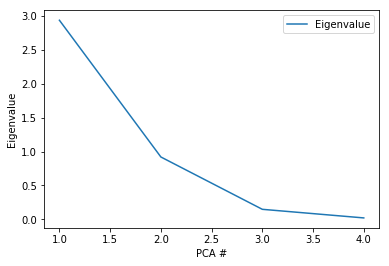

In [52]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "Eigenvalue")
plt.ylabel("Eigenvalue")
plt.xlabel("PCA #")
plt.legend(loc="best")

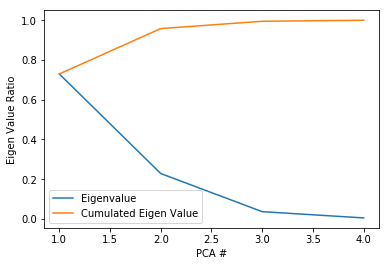

In [53]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = "Eigenvalue")

# Drawing Cumulated Ratio graph
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label = "Cumulated Eigen Value")
plt.ylabel("Eigen Value Ratio")
plt.xlabel("PCA #")
plt.legend(loc="best")

In [54]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, \
                                                columns = ["Prin" + str(i) for i in range (1,len(x_cols)+1)])], axis = 1)

df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


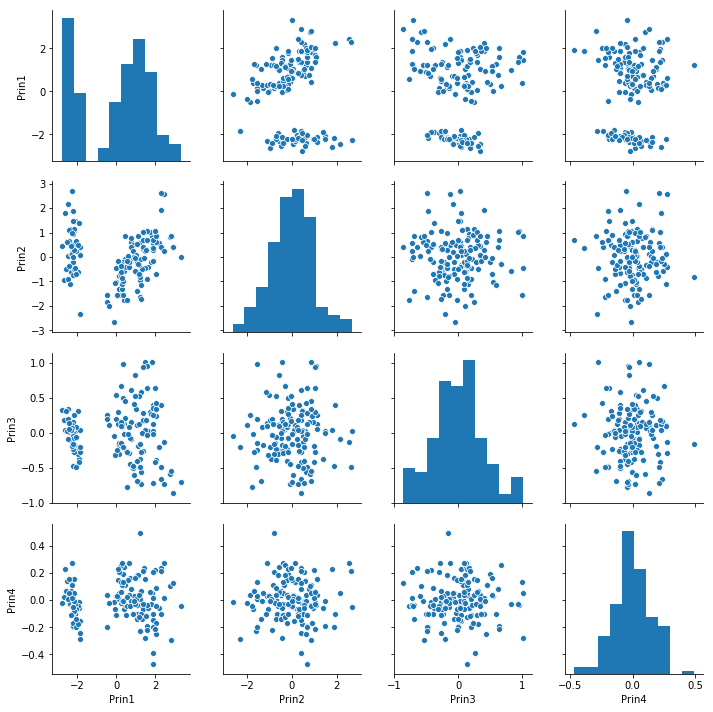

In [55]:
sns.pairplot(df_pca)

In [56]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


In [58]:
# 원데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
df_raw_x_const.head()
# const 기본값 1 주는 건가
# 왜 주는 거지...?

,const,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
